In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 361 images belonging to 8 classes.
Found 86 images belonging to 8 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 151s 12s/step - accuracy: 0.1290 - loss: 2.4918 - val_accuracy: 0.1163 - val_loss: 2.0326
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.2002 - loss: 1.9966 - val_accuracy: 0.3140 - val_loss: 1.9138
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2693 - loss: 1.8994 - val_accuracy: 0.3721 - val_loss: 1.7974
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.3528 - loss: 1.8411 - val_accuracy: 0.4535 - val_loss: 1.6059
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.3908 - loss: 1.6785 - val_accuracy: 0.5349 - val_loss: 1.4609
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4560 - loss: 1.5306 - val_accuracy: 0.4186 - val_loss: 1.3750
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5278 - loss: 1.3518 - val_accuracy: 0.5698 - val_loss: 1.2727
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5287 - loss: 1.3617 - val_accuracy: 0.5581 - val_los

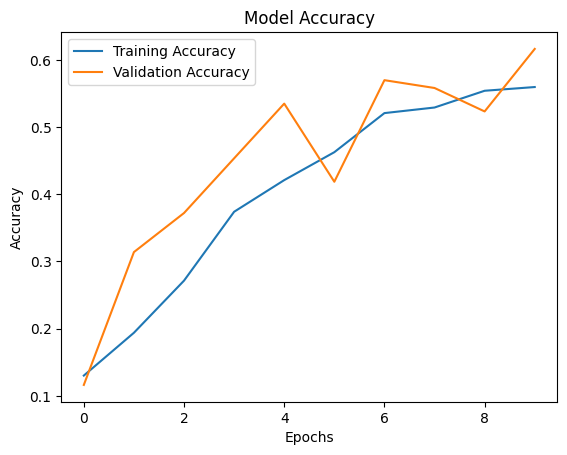

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5758 - loss: 1.3612
Validation Accuracy: 60.47%


In [ ]:
# Step 1: Install necessary libraries
!pip install tensorflow matplotlib

# Step 2: Import required modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Step 3: Set up paths
base_dir = '/content/drive/MyDrive/mushroom-images/'

# Step 4: Prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Step 5: Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Step 7: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')


Saving e8ef0687-af05-4524-8982-7dfb81b6ff79.jpg to e8ef0687-af05-4524-8982-7dfb81b6ff79.jpg


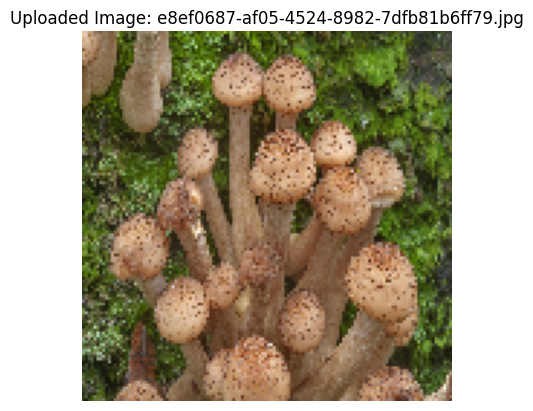

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Mushroom Species: honey_mushroom


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Upload a single image file
uploaded = files.upload()

for filename in uploaded.keys():
    # Step 2: Load and display image
    img = image.load_img(filename, target_size=(128, 128))
    plt.imshow(img)
    plt.title(f"Uploaded Image: {filename}")
    plt.axis('off')
    plt.show()

    # Step 3: Preprocess image
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Step 4: Make prediction
    pred = model.predict(img_array)
    class_idx = np.argmax(pred, axis=1)[0]

    # Step 5: Map prediction to species name
    species = list(train_generator.class_indices.keys())[class_idx]
    print(f"Predicted Mushroom Species: {species}")
